In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns





In [29]:
df=pd.read_csv("netflix_titles.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [32]:
# fill empty values 
df['director']= df['director'].fillna("Not Disclosed")
df['cast']= df['cast'].fillna("Not Mention")
df['country']= df['country'].fillna("Not Mention")
df['date_added']= df['date_added'].fillna("Not Added")
df['rating']= df['rating'].fillna("Not Added")
df['duration']= df['duration'].fillna("Not Added")


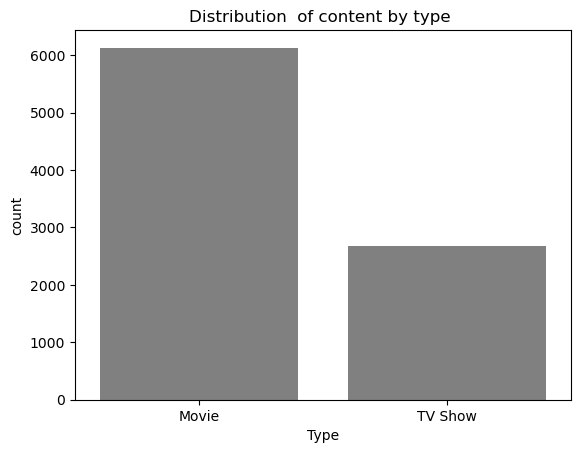

In [33]:
type_count = df['type'].value_counts()
sns.barplot(x=type_count.index,y=type_count.values,color='gray')
plt.title("Distribution  of content by type ")
plt.xlabel("Type")
plt.ylabel("count")
plt.show()


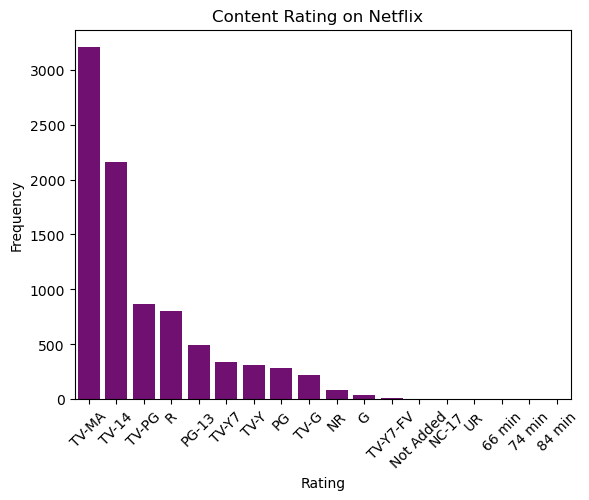

In [34]:
rating_count = df['rating'].value_counts()
sns.barplot(x=rating_count.index,y=rating_count.values,color='purple')
plt.title("Content Rating on Netflix  ")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [35]:
yearly_counts = df['release_year'] = df['date_added'].dt.year
yearly_counts


AttributeError: Can only use .dt accessor with datetimelike values

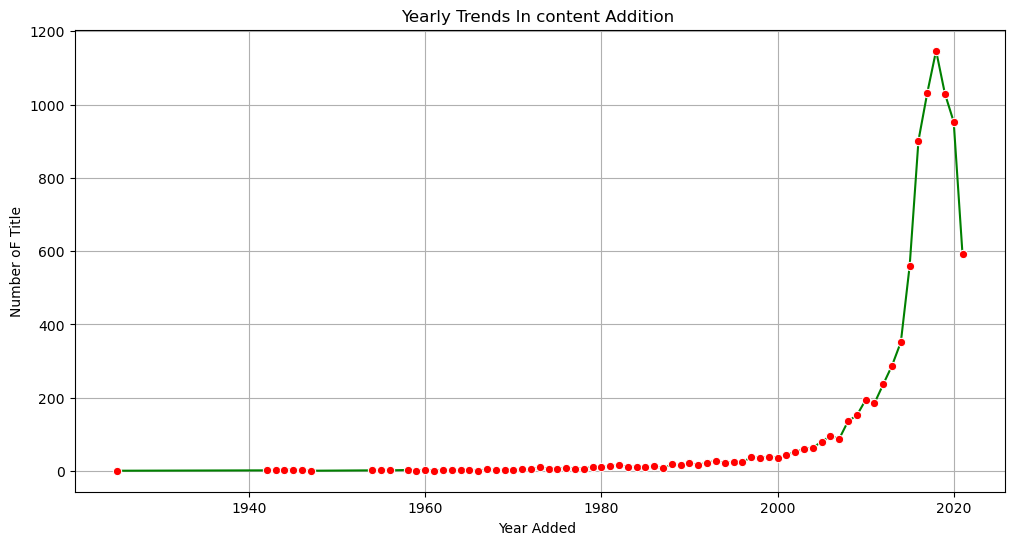

In [ ]:
yearly_counts = df['release_year'].value_counts().sort_index()
yearly_counts
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index,y=yearly_counts,marker='o', c='green',mfc='r')
plt.title("Yearly Trends In content Addition ")
plt.xlabel("Year Added ")
plt.ylabel('Number oF Title')
plt.grid(True)
plt.show()

In [ ]:
df['ge']

In [ ]:
df['genres'] = df['listed_in'].apply(lambda x:x.split(', '))
genre_count = pd.Series(sum(df['genres'],[])).value_counts().head(10)
genre_count

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

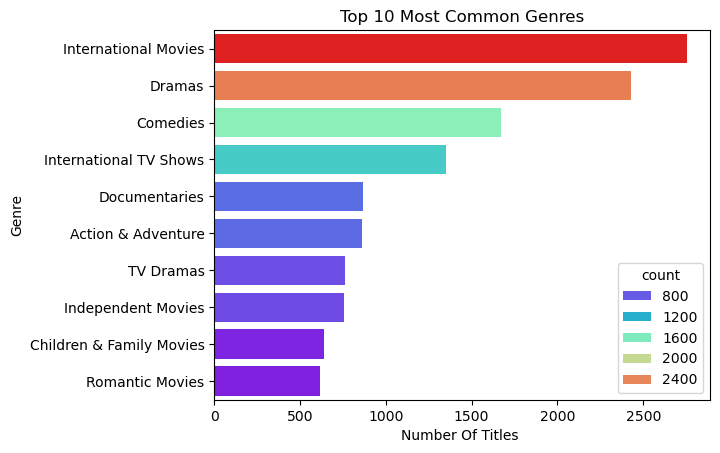

In [ ]:
sns.barplot(x=genre_count.values, y=genre_count.index, hue=genre_count,palette='rainbow')
plt.title("Top 10 Most Common Genres")
plt.xlabel('Number Of Titles ')
plt.ylabel('Genre')
plt.show()

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries


country
United States     2818
India              972
Not Mention        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

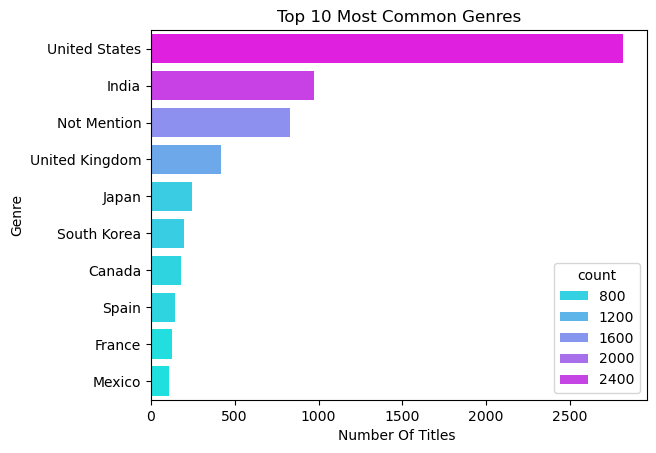

In [ ]:
sns.barplot(x=top_countries.values, y=top_countries.index, hue=genre_count,palette='cool')
plt.title("Top 10 Most Common Genres")
plt.xlabel('Number Of Titles ')
plt.ylabel('Genre')
plt.show()

In [ ]:
df["monthly_added"] = df['date_added'].dt.month  # Step 1: extract month (1-12)
monthly_count = df['monthly_added'].value_counts().sort_index()  # Step 2: count & sort
monthly_count


monthly_added
1.0    1
3.0    2
7.0    1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

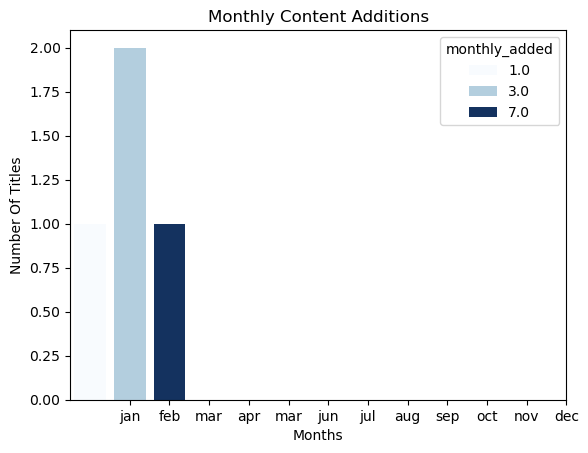

In [ ]:
sns.barplot(x=monthly_count.index , y=monthly_count.values,hue=
            monthly_count.index,palette='Blues')
plt.title("Monthly Content Additions")
plt.xlabel("Months")
plt.ylabel("Number Of Titles")
plt.xticks(range(1,13),['jan','feb','mar','apr','mar','jun','jul','aug','sep','oct','nov','dec'])
plt.show

In [ ]:
top_director =df['director'].value_counts().head(10)
print(top_director)

director
Not Disclosed             2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


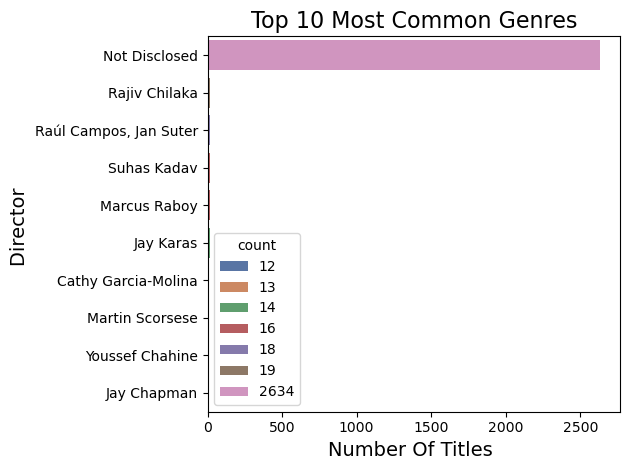

In [ ]:
sns.barplot(x=top_director.values, y=top_director.index,hue=top_director,palette='deep')
plt.title("Top 10 Most Common Genres",fontsize=16)
plt.xlabel('Number Of Titles ',fontsize=14)
plt.ylabel('Director ',fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
WordCloud= WordCloud(width=800,height=400,background_color='black').generate(''.join(df['title']))
WordCloud

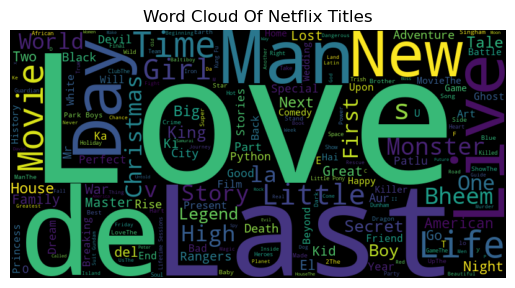

In [ ]:
plt.Figure(figsize=(8,6))
plt.imshow(WordCloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Of Netflix Titles')
plt.show()

In [ ]:
Duration = df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
Duration


,0
0,90.0
1,2.0
2,1.0
3,1.0
4,2.0
...,...
8802,158.0
8803,2.0
8804,88.0
8805,88.0


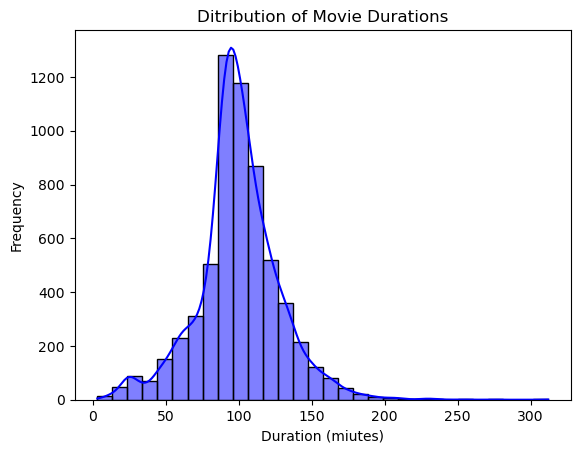

In [ ]:
plt.Figure(figsize=(10,6))
sns.histplot(df[df['type'] == 'Movie']['duration_num'],bins=30,kde=True,color='Blue')
plt.title('Ditribution of Movie Durations')
plt.xlabel('Duration (miutes)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
titles_per_year = df.groupby('release_year').size()
titles_per_year

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

In [ ]:
top_10_year = titles_per_year.sort_values(ascending=False).head(10)
top_10_year

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
dtype: int64

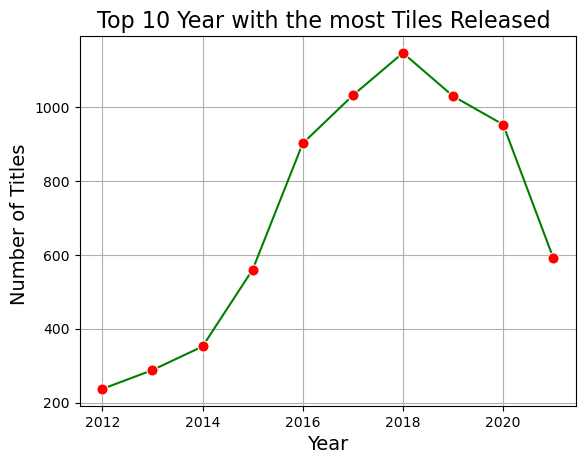

In [ ]:
plt.Figure(figsize=(10,6))

sns.lineplot(x=top_10_year.index ,y=top_10_year.values,marker='o',c='g',ms=8,mfc='r')
plt.title('Top 10 Year with the most Tiles Released ', fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Titles ',fontsize=14)
plt.grid()
plt.show()

Key Insights
1. Movies make up 70% of Netflix’s content, while TV Shows are 30%.
2. Top genres: Documentaries, Dramas, and Comedies.
3. The U.S., India, and the U.K. are leading content producers.
4. Most content is rated TV-MA, focusing on mature audiences.
5. Recent years show a peak in content additions.

,date_added,monthly_added
0,2023-01-15,1.0
1,2023-03-10,3.0
2,2023-03-25,3.0
3,2023-07-18,7.0
4,NaT,NaN


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Mention,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Disclosed,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Mention,"September 24, 2021",2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Disclosed,Not Mention,Not Mention,"September 24, 2021",2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Disclosed,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Not Disclosed,Not Mention,Not Mention,"July 1, 2019",2018,TV-Y7,2.0,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
